Implementation of an oracle encoded with 011

In [26]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from numpy import random

def unitary(circuit):
  simulator = Aer.get_backend('unitary_simulator')
  result = simulator.run(qc).result()
  return result.get_unitary(qc)

def create_random_oracle():
  # generate a 3-item array of random zeros and ones
  secret_code = random.randint(2, size=1)

  bv_circuit = QuantumCircuit(2, name="BernVaz\nOracle\n#{}".format(secret_code))

  # loop through each digit of our secret code and CNOT the appropriate 
  # code qubit with the control qubit
  idx = 0
  for idx, digit in enumerate(secret_code):
    if digit == 1:
      bv_circuit.cx(idx, 1)

  # create our custom gate
  bern_vaz_oracle = bv_circuit.to_instruction()
  
  return [secret_code, bern_vaz_oracle]

q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

# put our input qubits into superposition
qc.h(0)
# qc.h(1)
# qc.h(2)

# qc.x(1) # initialize the control qubit to |1>
qc.h(1)

secret_code, oracle = create_random_oracle()
# qc.append(oracle, [0,1])

qc.cx(0,1)

# # take the outputs out of superposition
# qc.h(0)
# qc.h(1)
# # qc.h(2)
# # qc.h(3)

# qc.measure(0, 0)
# qc.measure(1, 1)

# print(unitary(qc).draw('latex_source'))
unitary(qc).draw('latex')
# qc.draw('mpl')

<IPython.core.display.Latex object>

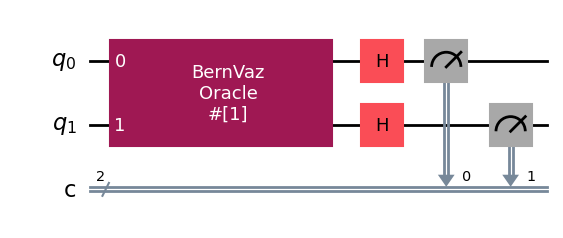

In [2]:

# hook the custom gate into qubits 0-1
qc.append(oracle, [0,1])

# take the outputs out of superposition
qc.h(0)
qc.h(1)
# qc.h(2)
# qc.h(3)

qc.measure(0, 0)
qc.measure(1, 1)
# qc.measure(2, 2)
# qc.measure(3, 3)

qc.draw(output='mpl')


In [3]:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(transpile(qc, simulator)).result()

print("Secret code is {}".format(secret_code))

counts = result.get_counts(qc)
print("Simulation result is {}".format(counts))

first_result = [*counts][0] # get the first key of the result dict
answer = first_result[::-1][0: 3] # reverse the order of output and get items 0-2

print("We got the answer: " + answer)

Secret code is [1]
Simulation result is {'01': 246, '10': 250, '11': 272, '00': 256}
We got the answer: 10


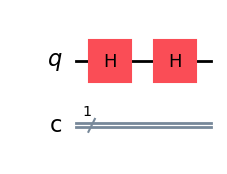

In [28]:
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(q, c)

# put our input qubits into superposition
qc.h(0)
qc.h(0)

qc.draw(output='mpl')

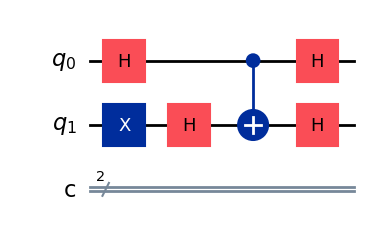

In [30]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

# put our input qubits into superposition
qc.h(0)
qc.x(1)
qc.h(1)

qc.cx(0,1)

qc.h(0)
qc.h(1)

qc.draw(output='mpl')

In [34]:
from qiskit.visualization import array_to_latex
from numpy import dot, kron, sqrt, tensordot, matmul, array, matrix

statevector = [
     [1],
     [0],  
     [1],
     [0]
]

array_to_latex(statevector)

<IPython.core.display.Latex object>